**Name: Ganesh Kulkarni  PRN: 1132210686**

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from numpy import loadtxt
import pandas as pd

In [43]:
df = pd.read_csv('/content/drive/MyDrive/datasets/power_consumption.csv')
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [44]:
df.shape

(52416, 8)

In [45]:
X = df.iloc[:,:7]
y = df.iloc[:,7]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model 1 



In [47]:
model=Sequential()
model.add(Dense(128,input_dim=7,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

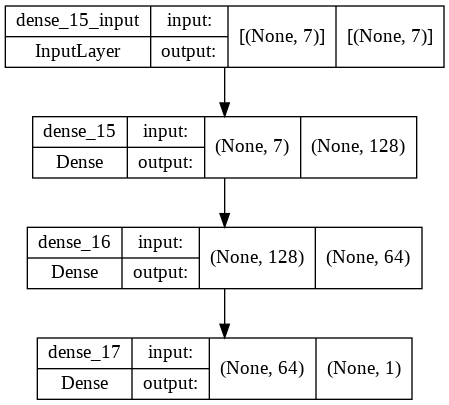

In [48]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [49]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
msle = MeanSquaredLogarithmicError()

In [50]:
model.compile(loss='msle',optimizer='adam',metrics=['RootMeanSquaredError'])

In [51]:
model.fit(X_train,y_train,epochs=30,batch_size=20,verbose=1)

Epoch 1/30
2097/2097 [==============================] - 3s 1ms/step - loss: 14.5541 - root_mean_squared_error: 17957.6562
Epoch 2/30
2097/2097 [==============================] - 3s 1ms/step - loss: 1.4265 - root_mean_squared_error: 13236.5596
Epoch 3/30
2097/2097 [==============================] - 3s 1ms/step - loss: 0.2301 - root_mean_squared_error: 7573.1265
Epoch 4/30
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0887 - root_mean_squared_error: 5083.2739
Epoch 5/30
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0549 - root_mean_squared_error: 4145.3721
Epoch 6/30
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0411 - root_mean_squared_error: 3696.7651
Epoch 7/30
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0375 - root_mean_squared_error: 3536.5515
Epoch 8/30
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0356 - root_mean_squared_error: 3431.9397
Epoch 9/30
2097/2097 [===============

In [52]:
pred = model.predict(X_test)
import numpy as np
from sklearn.metrics import r2_score
pred = np.squeeze(pred)
y_test = np.squeeze(np.array(y_test))
r2_score(y_test,pred)

0.8159181814711473

## Model 2


In [53]:
model=Sequential()
model.add(Dense(128,input_dim=7,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='PReLU'))

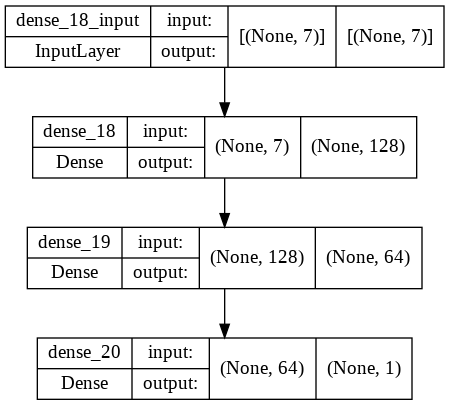

In [54]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [55]:
model.compile(loss='msle',optimizer='adam',metrics=['RootMeanSquaredError'])

In [56]:
model.fit(X_train,y_train,epochs=20,batch_size=20,verbose=1)

Epoch 1/20
2097/2097 [==============================] - 3s 1ms/step - loss: 13.4117 - root_mean_squared_error: 17788.7695
Epoch 2/20
2097/2097 [==============================] - 3s 1ms/step - loss: 1.1708 - root_mean_squared_error: 12582.8184
Epoch 3/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.1877 - root_mean_squared_error: 6974.6714
Epoch 4/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0806 - root_mean_squared_error: 4825.5288
Epoch 5/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0505 - root_mean_squared_error: 3977.1279
Epoch 6/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0393 - root_mean_squared_error: 3601.1226
Epoch 7/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0362 - root_mean_squared_error: 3458.4336
Epoch 8/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0343 - root_mean_squared_error: 3354.4028
Epoch 9/20
2097/2097 [===============

In [57]:
pred = model.predict(X_test)
import numpy as np
from sklearn.metrics import r2_score
pred = np.squeeze(pred)
y_test = np.squeeze(np.array(y_test))
r2_score(y_test,pred)

0.8043211369060534

## Model 3 

In [58]:
model=Sequential()
model.add(Dense(128,input_dim=7,activation='ELU'))
model.add(Dense(64,activation='ELU'))
model.add(Dense(1,activation='ELU'))

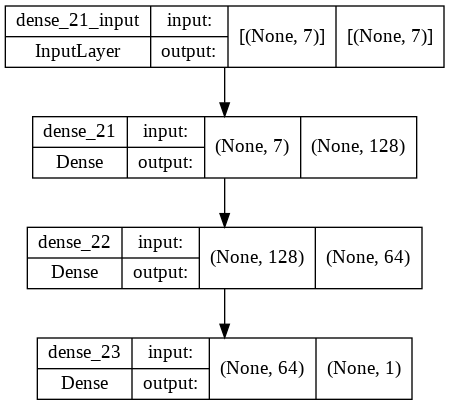

In [59]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [60]:
model.compile(loss='msle',optimizer='adam',metrics=['RootMeanSquaredError'])

In [61]:
model.fit(X_train,y_train,epochs=20,batch_size=20,verbose=1)

Epoch 1/20
2097/2097 [==============================] - 3s 1ms/step - loss: 16.4812 - root_mean_squared_error: 18140.8184
Epoch 2/20
2097/2097 [==============================] - 3s 1ms/step - loss: 1.6151 - root_mean_squared_error: 13954.1836
Epoch 3/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.2165 - root_mean_squared_error: 7903.9058
Epoch 4/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0558 - root_mean_squared_error: 4374.7002
Epoch 5/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0441 - root_mean_squared_error: 3821.1719
Epoch 6/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0410 - root_mean_squared_error: 3727.1289
Epoch 7/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0397 - root_mean_squared_error: 3665.6719
Epoch 8/20
2097/2097 [==============================] - 3s 1ms/step - loss: 0.0387 - root_mean_squared_error: 3603.8345
Epoch 9/20
2097/2097 [===============

In [62]:
pred = model.predict(X_test)
import numpy as np
from sklearn.metrics import r2_score
pred = np.squeeze(pred)
y_test = np.squeeze(np.array(y_test))
r2_score(y_test,pred)

0.8037325669107576